In [8]:
import psycopg2 
import pandas as pd
import plotly.express as px
import json

In [9]:
mydb = {
    'host' : 'localhost',
    'database' : 'guvi',
    'user' :'postgres',
    'password' : 'ags009',
    'port' : '5432'

}

In [10]:
connection = psycopg2.connect(**mydb)
cursor = connection.cursor()

In [11]:
cursor.execute("select state, transaction_amount from agg_tra where year='2021' and quarter=1 and transaction_type='Financial Services' group by state,transaction_amount order by transaction_amount desc limit 30" )
result = cursor.fetchall()
transactions = pd.DataFrame(result,columns=['state','transaction_amount'] )
transactions.head(5)

,state,transaction_amount
0,maharashtra,4.929002e+08
1,karnataka,4.758150e+08
2,telangana,3.201534e+08
3,andhra-pradesh,2.703130e+08
4,uttar-pradesh,2.661048e+08


In [12]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [35]:
india_states = json.load(open("../data/states_india.geojson", "r"))
india_states_df = pd.DataFrame(india_states)
india_states_df["features"]

0     {'type': 'Feature', 'geometry': {'type': 'Mult...
1     {'type': 'Feature', 'geometry': {'type': 'Mult...
2     {'type': 'Feature', 'geometry': {'type': 'Mult...
3     {'type': 'Feature', 'geometry': {'type': 'Mult...
4     {'type': 'Feature', 'geometry': {'type': 'Mult...
5     {'type': 'Feature', 'geometry': {'type': 'Mult...
6     {'type': 'Feature', 'geometry': {'type': 'Mult...
7     {'type': 'Feature', 'geometry': {'type': 'Mult...
8     {'type': 'Feature', 'geometry': {'type': 'Mult...
9     {'type': 'Feature', 'geometry': {'type': 'Mult...
10    {'type': 'Feature', 'geometry': {'type': 'Mult...
11    {'type': 'Feature', 'geometry': {'type': 'Mult...
12    {'type': 'Feature', 'geometry': {'type': 'Mult...
13    {'type': 'Feature', 'geometry': {'type': 'Mult...
14    {'type': 'Feature', 'geometry': {'type': 'Mult...
15    {'type': 'Feature', 'geometry': {'type': 'Mult...
16    {'type': 'Feature', 'geometry': {'type': 'Mult...
17    {'type': 'Feature', 'geometry': {'type': '

In [38]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

{'state': ['Telangana',
  'Andaman & Nicobar Island',
  'Andhra Pradesh',
  'Arunanchal Pradesh',
  'Assam',
  'Bihar',
  'Chhattisgarh',
  'Daman & Diu',
  'Goa',
  'Gujarat',
  'Haryana',
  'Himachal Pradesh',
  'Jammu & Kashmir',
  'Jharkhand',
  'Karnataka',
  'Kerala',
  'Lakshadweep',
  'Madhya Pradesh',
  'Maharashtra',
  'Manipur',
  'Chandigarh',
  'Puducherry',
  'Punjab',
  'Rajasthan',
  'Sikkim',
  'Tamil Nadu',
  'Tripura',
  'Uttar Pradesh',
  'Uttarakhand',
  'West Bengal',
  'Odisha',
  'Dadara & Nagar Havelli',
  'Meghalaya',
  'Mizoram',
  'Nagaland',
  'NCT of Delhi']}

In [41]:
df = pd.read_csv("india_census.csv")
df["Density"] = df["Density[a]"].apply(lambda x: int(x.split("/")[0].replace(",", "")))
df["id"] = df["State or union territory"].apply(lambda x: state_id_map[x])

<Axes: >

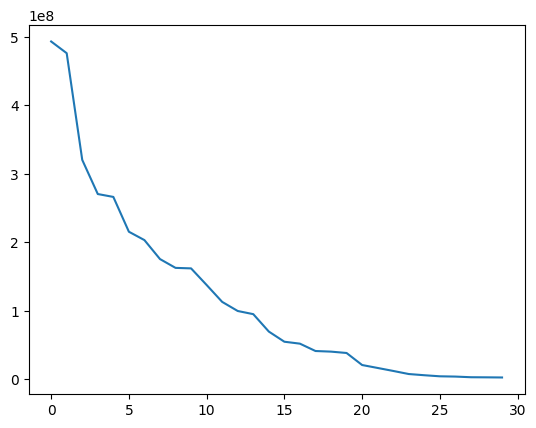

In [17]:
transactions["transaction_amount"].plot()

In [49]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Population Density",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

ValueError: All arguments should have the same length. The length of column argument `df[hover_data_0]` is 30, whereas the length of  previously-processed arguments ['hover_name', 'locations'] is 2

In [51]:
import psycopg2
import pandas as pd
import plotly.express as px
import json

# Database connection details
mydb = {
    'host': 'localhost',
    'database': 'guvi',
    'user': 'postgres',
    'password': 'ags009',
    'port': '5432'
}

# Connect to the database
connection = psycopg2.connect(**mydb)
cursor = connection.cursor()

# Fetch transaction data from the database
query = """
SELECT state, SUM(transaction_amount) as transaction_amount 
FROM agg_tra 
WHERE year='2021' AND quarter=1 AND transaction_type='Financial Services' 
GROUP BY state 
ORDER BY transaction_amount DESC 
"""
cursor.execute(query)
result = cursor.fetchall()
transactions = pd.DataFrame(result, columns=['state', 'transaction_amount'])
transactions.head(5)

# Set Plotly renderer to browser
import plotly.io as pio
pio.renderers.default = 'browser'

# Load the GeoJSON file
india_states = json.load(open("../data/states_india.geojson", "r"))

# Prepare a state ID map for matching
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"].upper()] = feature["id"]

# Add the state IDs to the transaction DataFrame
transactions["id"] = transactions["state"].apply(lambda x: state_id_map.get(x.upper(), None))

# Check for any missing IDs
missing_ids = transactions[transactions["id"].isnull()]
if not missing_ids.empty:
    print("Missing IDs for the following states:")
    print(missing_ids)

# Plot the data
fig = px.choropleth(
    transactions,
    locations="id",
    geojson=india_states,
    color="transaction_amount",
    hover_name="state",
    hover_data=["transaction_amount"],
    title="Financial Services Transactions by State in Q1 2021"
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


Missing IDs for the following states:
                                 state  transaction_amount  id
3                       andhra-pradesh        2.703130e+08 NaN
4                        uttar-pradesh        2.661048e+08 NaN
5                           tamil-nadu        2.153194e+08 NaN
6                                delhi        2.031069e+08 NaN
7                          west-bengal        1.754458e+08 NaN
9                       madhya-pradesh        1.618384e+08 NaN
20                     jammu-&-kashmir        2.084866e+07 NaN
21                    himachal-pradesh        1.655421e+07 NaN
29                   arunachal-pradesh        2.672460e+06 NaN
30  dadra-&-nagar-haveli-&-daman-&-diu        1.930009e+06 NaN
32           andaman-&-nicobar-islands        1.469351e+06 NaN
33                              ladakh        1.455016e+06 NaN
